<a href="https://colab.research.google.com/github/pourya-azad/AMDILM/blob/main/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import keras

In [60]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [61]:
model = keras.Sequential()

In [62]:
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
xx_train = x_train_reshaped.astype('float32') / 255.0

In [63]:
def create_model():
  inputs = keras.Input(shape=(28, 28, 1)) # Original 1-channel input

  x1 = keras.layers.Conv2D(3, (3,3), padding='same', strides=1)(inputs)
  x2 = keras.layers.Conv2D(3, (5,5), padding='same', strides=1)(inputs)
  concatenated_features = keras.layers.Concatenate()([x1, x2]) # Combines to (batch, 28, 28, 6)

  pooled = keras.layers.AveragePooling2D((2,2))(concatenated_features)
  conv_after_pool = keras.layers.Conv2D(2,(3,3),padding='same')(pooled)
  max_pooled = keras.layers.MaxPooling2D((2,2))(conv_after_pool)
  flattened = keras.layers.Flatten()(max_pooled)
  dense1 = keras.layers.Dense(10)(flattened)
  dense2 = keras.layers.Dense(30)(dense1)
  outputs = keras.layers.Dense(10, activation='softmax')(dense2)

  return keras.Model(inputs=inputs, outputs=outputs)

y_train = keras.layers.CategoryEncoding(10,output_mode="one_hot")(y_train)
y_test = keras.layers.CategoryEncoding(10,output_mode="one_hot")(y_test)
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
xx_test = x_test_reshaped.astype('float32') / 255.0

In [64]:
optimizer = ["Adam","RMSprop","Adamax","SGD"]
loss = ["categorical_crossentropy","MeanSquaredError","MeanAbsoluteError","Huber","CosineSimilarity"]
results = {}
for i in optimizer:
  for j in loss:
    model = create_model()
    model.compile(optimizer=i, loss=j, metrics=["accuracy"])
    history = model.fit(xx_train, y_train, epochs=3, batch_size=36)
    test_acc = model.evaluate(xx_test, y_test)[1]
    results[(i,j)] = {
        "test_acc": test_acc,
        "history": history.history["accuracy"]
    }

Epoch 1/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7453 - loss: 0.8051
Epoch 2/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9187 - loss: 0.2770
Epoch 3/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9334 - loss: 0.2294
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9263 - loss: 0.2289
Epoch 1/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7060 - loss: 0.0378
Epoch 2/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9112 - loss: 0.0135
Epoch 3/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9278 - loss: 0.0110
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9271 - loss: 0.0111
Epoch 1/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5629 - loss: 0.0905
Epoch 2/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8231 - loss: 0.0358
Epoch 3/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8342 - loss: 0.0335
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8352 - loss:

In [68]:
results

{('Adam', 'categorical_crossentropy'): {'test_acc': 0.9375,
  'history': [0.8543333411216736, 0.92330002784729, 0.93545001745224]},
 ('Adam', 'MeanSquaredError'): {'test_acc': 0.9358999729156494,
  'history': [0.8332666754722595, 0.9155833125114441, 0.9295333623886108]},
 ('Adam', 'MeanAbsoluteError'): {'test_acc': 0.8436999917030334,
  'history': [0.7162500023841858, 0.8247833251953125, 0.8333500027656555]},
 ('Adam', 'Huber'): {'test_acc': 0.9358000159263611,
  'history': [0.8205666542053223, 0.9103666543960571, 0.924916684627533]},
 ('Adam', 'CosineSimilarity'): {'test_acc': 0.9444000124931335,
  'history': [0.8683666586875916, 0.9320166707038879, 0.9407666921615601]},
 ('RMSprop', 'categorical_crossentropy'): {'test_acc': 0.9409999847412109,
  'history': [0.8436166644096375, 0.9232166409492493, 0.9348499774932861]},
 ('RMSprop', 'MeanSquaredError'): {'test_acc': 0.9157000184059143,
  'history': [0.7963833212852478, 0.8947333097457886, 0.909166693687439]},
 ('RMSprop', 'MeanAbsolute

In [69]:
import matplotlib.pyplot as plt

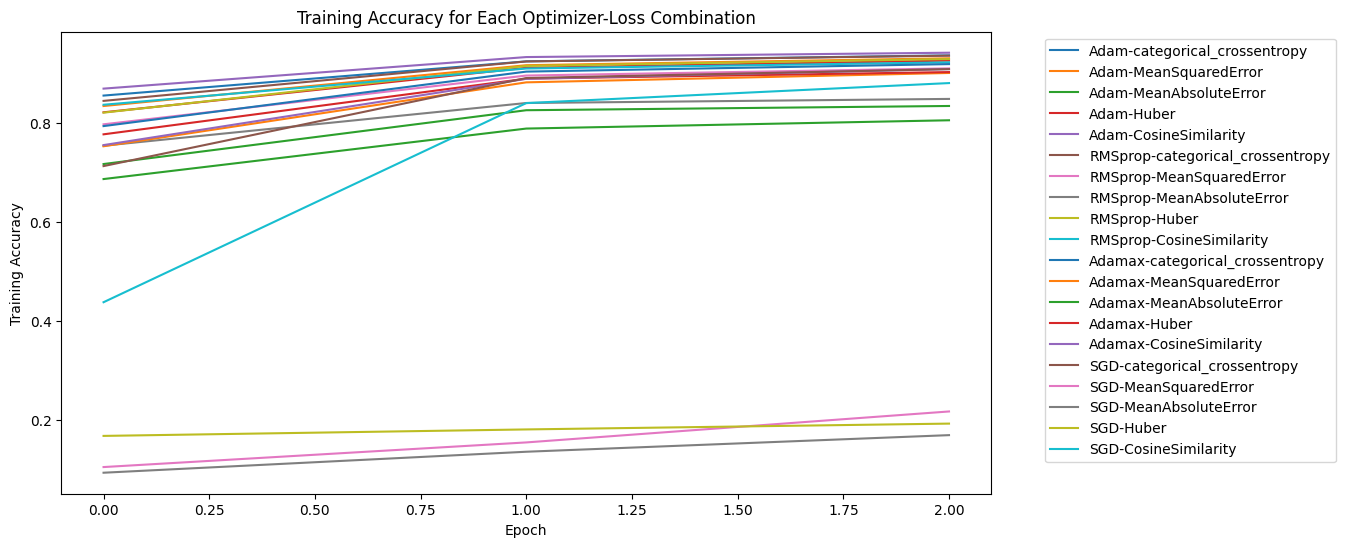

In [70]:
plt.figure(figsize=(12,6))
for i in optimizer:
  for j in loss:
        label = f"{i}-{j}"
        plt.plot(results[(i, j)]["history"], label=label)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy for Each Optimizer-Loss Combination")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

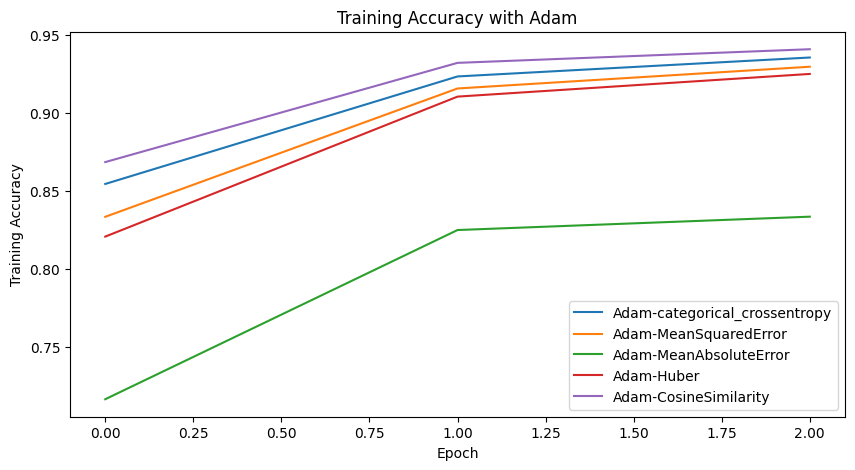

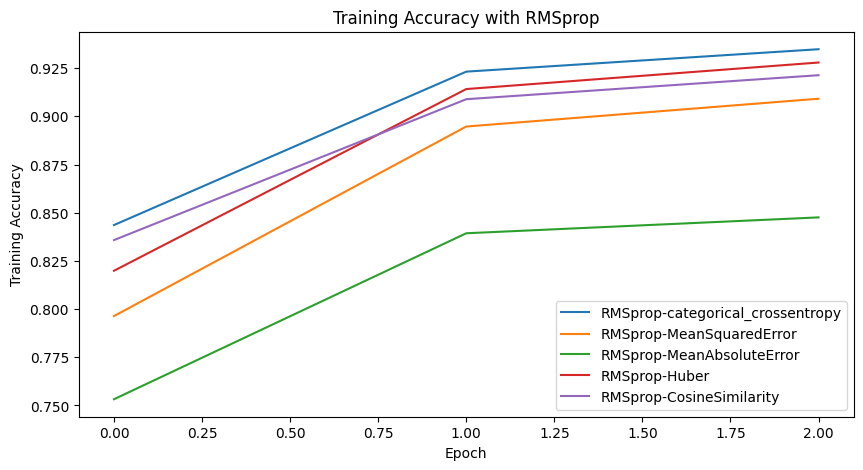

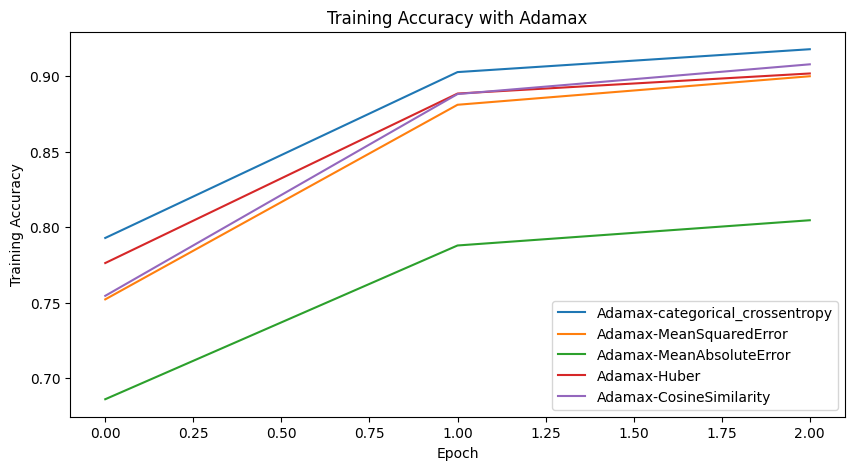

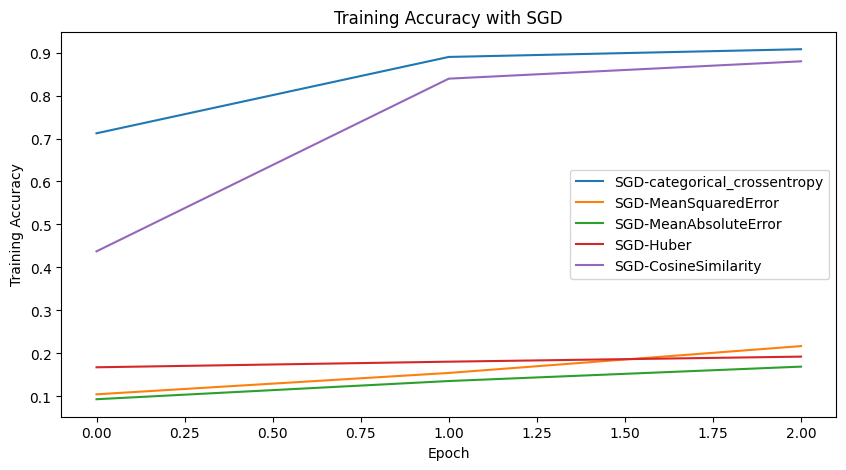

In [71]:
for opt in optimizer:
    plt.figure(figsize=(10,5))
    for l in loss:
        label = f"{opt}-{l}"
        plt.plot(results[(opt, l)]["history"], label=label)
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.title(f"Training Accuracy with {opt}")
    plt.legend()
    plt.show()


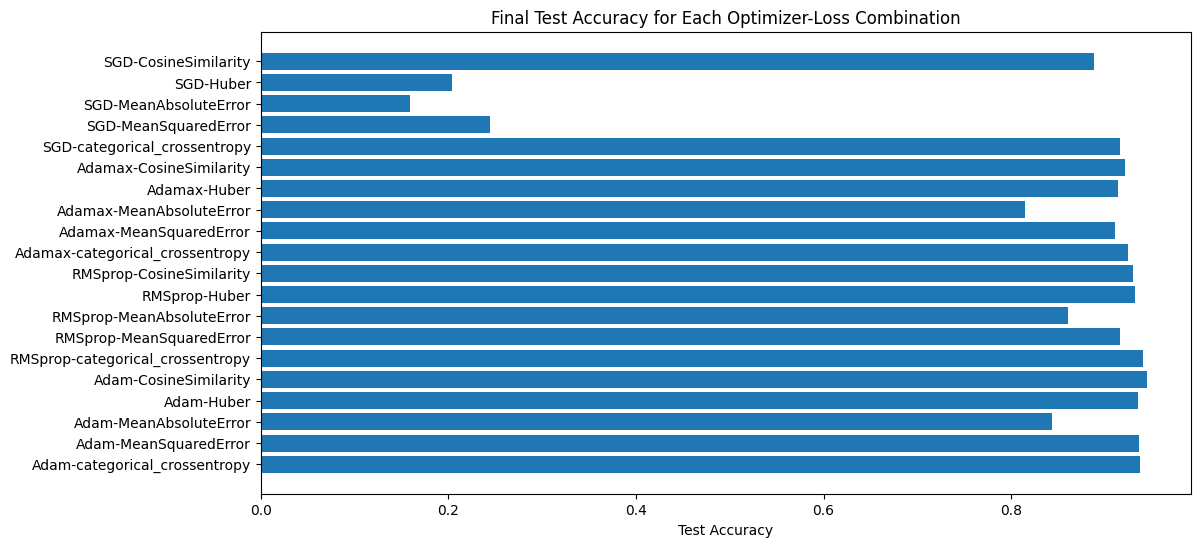

In [72]:
import numpy as np

final_acc = [results[(i,j)]["test_acc"] for i in optimizer for j in loss]
labels = [f"{i}-{j}" for i in optimizer for j in loss]

plt.figure(figsize=(12,6))
plt.barh(labels, final_acc)
plt.xlabel("Test Accuracy")
plt.title("Final Test Accuracy for Each Optimizer-Loss Combination")
plt.show()


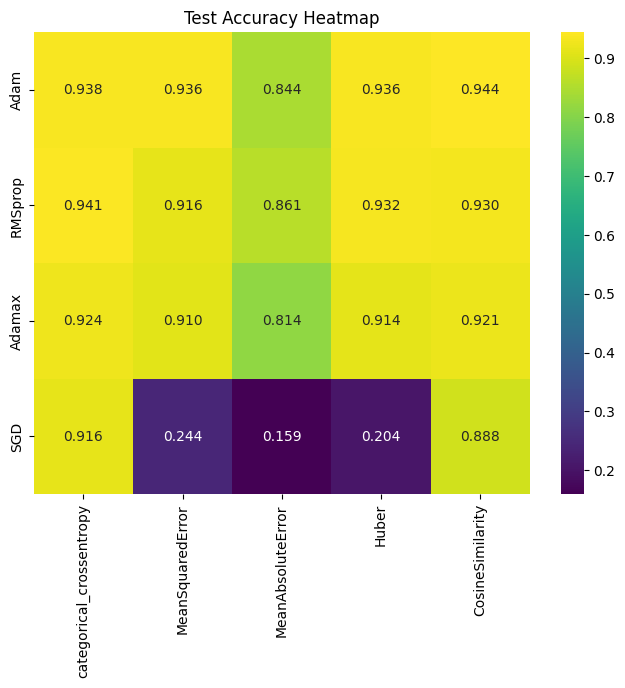

In [73]:
import seaborn as sns
import pandas as pd

# Build a dataframe with optimizers as rows and losses as columns
df = pd.DataFrame(index=optimizer, columns=loss)
for i in optimizer:
    for j in loss:
        df.loc[i, j] = results[(i,j)]["test_acc"]

plt.figure(figsize=(8,6))
sns.heatmap(df.astype(float), annot=True, fmt=".3f", cmap="viridis")
plt.title("Test Accuracy Heatmap")
plt.show()


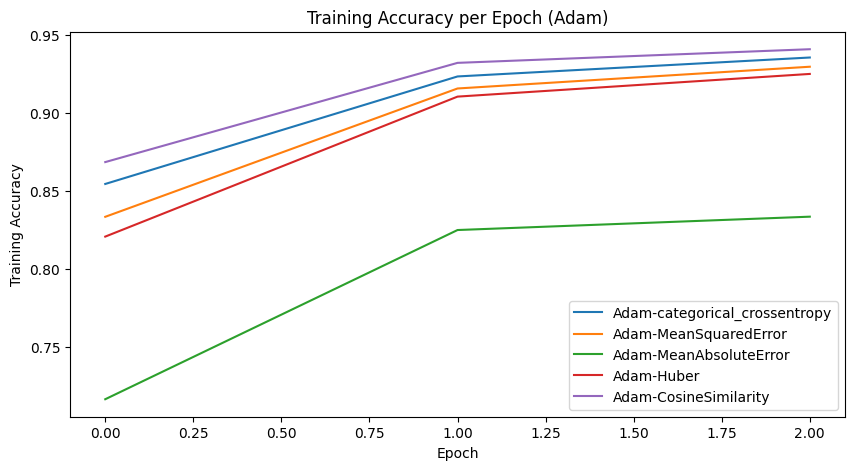

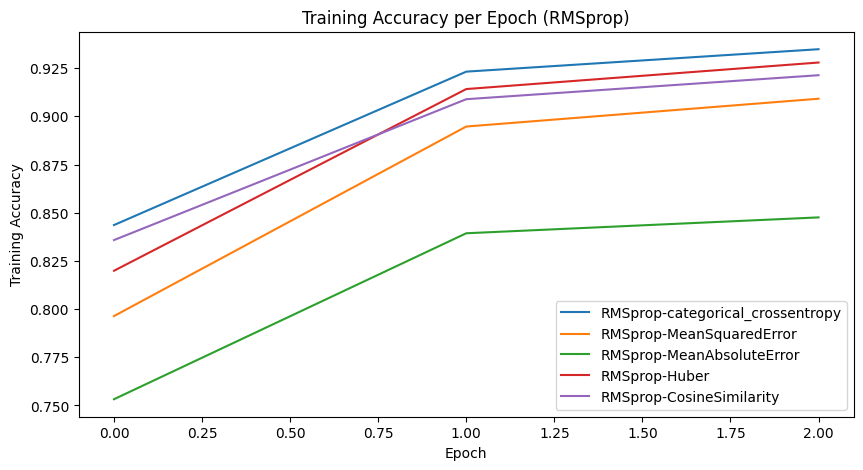

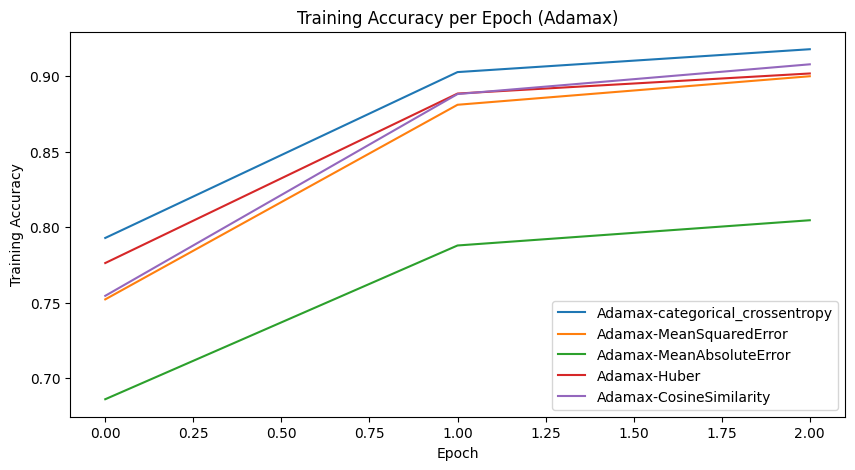

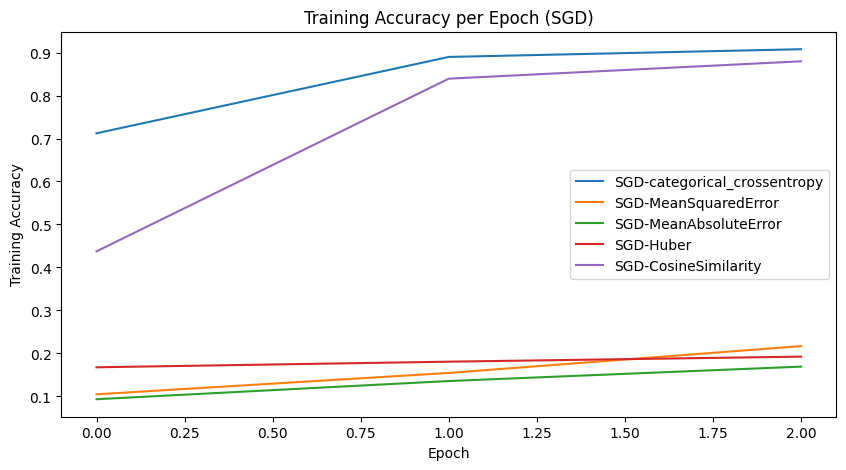

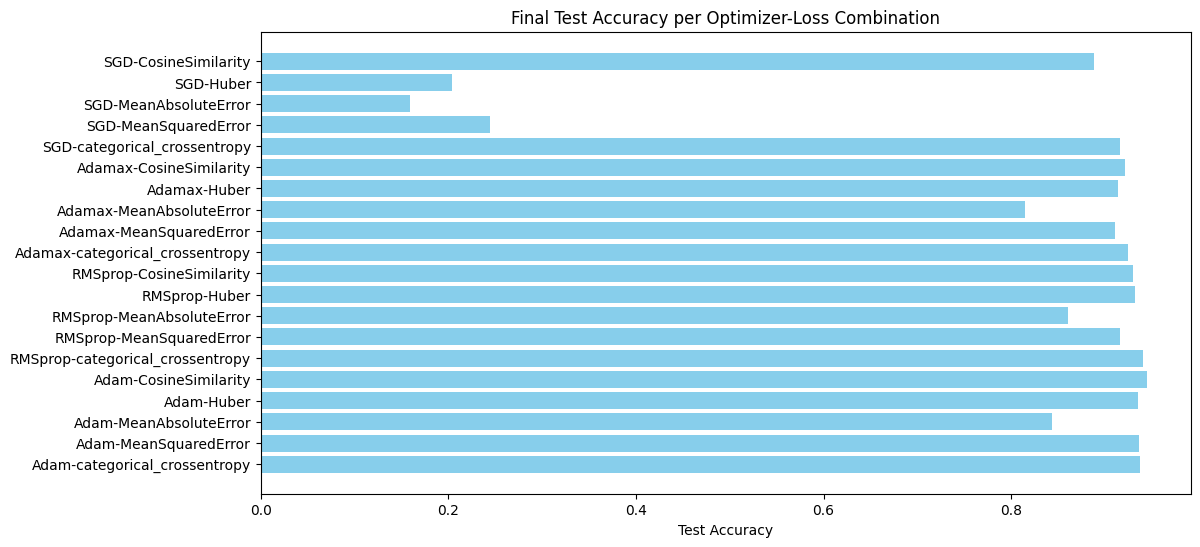

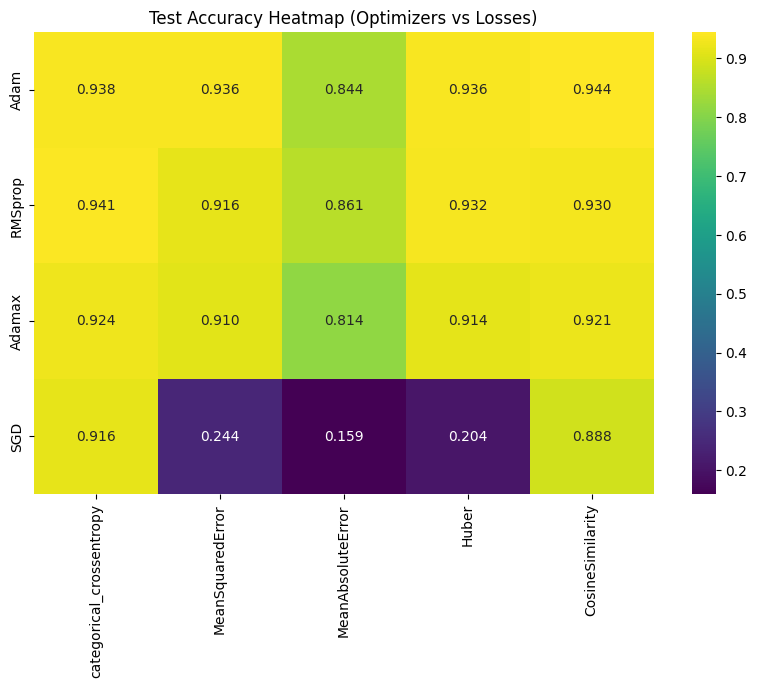

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

optimizers = ["Adam","RMSprop","Adamax","SGD"]
losses = ["categorical_crossentropy","MeanSquaredError","MeanAbsoluteError","Huber","CosineSimilarity"]
results = {('Adam', 'categorical_crossentropy'): {'test_acc': 0.9375,
  'history': [0.8543333411216736, 0.92330002784729, 0.93545001745224]},
 ('Adam', 'MeanSquaredError'): {'test_acc': 0.9358999729156494,
  'history': [0.8332666754722595, 0.9155833125114441, 0.9295333623886108]},
 ('Adam', 'MeanAbsoluteError'): {'test_acc': 0.8436999917030334,
  'history': [0.7162500023841858, 0.8247833251953125, 0.8333500027656555]},
 ('Adam', 'Huber'): {'test_acc': 0.9358000159263611,
  'history': [0.8205666542053223, 0.9103666543960571, 0.924916684627533]},
 ('Adam', 'CosineSimilarity'): {'test_acc': 0.9444000124931335,
  'history': [0.8683666586875916, 0.9320166707038879, 0.9407666921615601]},
 ('RMSprop', 'categorical_crossentropy'): {'test_acc': 0.9409999847412109,
  'history': [0.8436166644096375, 0.9232166409492493, 0.9348499774932861]},
 ('RMSprop', 'MeanSquaredError'): {'test_acc': 0.9157000184059143,
  'history': [0.7963833212852478, 0.8947333097457886, 0.909166693687439]},
 ('RMSprop', 'MeanAbsoluteError'): {'test_acc': 0.8607000112533569,
  'history': [0.7532333135604858, 0.8393499851226807, 0.8475833535194397]},
 ('RMSprop', 'Huber'): {'test_acc': 0.9322999715805054,
  'history': [0.8198999762535095, 0.9141833186149597, 0.9279500246047974]},
 ('RMSprop', 'CosineSimilarity'): {'test_acc': 0.9301999807357788,
  'history': [0.8358166813850403, 0.9089166522026062, 0.9213666915893555]},
 ('Adamax', 'categorical_crossentropy'): {'test_acc': 0.9240999817848206,
  'history': [0.7927833199501038, 0.9026666879653931, 0.9178166389465332]},
 ('Adamax', 'MeanSquaredError'): {'test_acc': 0.9104999899864197,
  'history': [0.7520999908447266, 0.8810166716575623, 0.8999166488647461]},
 ('Adamax', 'MeanAbsoluteError'): {'test_acc': 0.814300000667572,
  'history': [0.685949981212616, 0.7878000140190125, 0.8045166730880737]},
 ('Adamax', 'Huber'): {'test_acc': 0.9135000109672546,
  'history': [0.7761666774749756, 0.888450026512146, 0.9017500281333923]},
 ('Adamax', 'CosineSimilarity'): {'test_acc': 0.9214000105857849,
  'history': [0.7544500231742859, 0.8881166577339172, 0.9078166484832764]},
 ('SGD', 'categorical_crossentropy'): {'test_acc': 0.9160000085830688,
  'history': [0.7121000289916992, 0.8896999955177307, 0.9076499938964844]},
 ('SGD', 'MeanSquaredError'): {'test_acc': 0.24390000104904175,
  'history': [0.10503333061933517, 0.1547333300113678, 0.21716666221618652]},
 ('SGD', 'MeanAbsoluteError'): {'test_acc': 0.15940000116825104,
  'history': [0.09361666440963745, 0.13593333959579468, 0.1694166660308838]},
 ('SGD', 'Huber'): {'test_acc': 0.2037000060081482,
  'history': [0.16788333654403687, 0.18093332648277283, 0.19268333911895752]},
 ('SGD', 'CosineSimilarity'): {'test_acc': 0.8881999850273132,
  'history': [0.43753331899642944, 0.8391833305358887, 0.8795333504676819]}}

# -----------------------------
# 1️⃣ Training Accuracy Curves
# -----------------------------
for opt in optimizers:
    plt.figure(figsize=(10,5))
    for l in losses:
        label = f"{opt}-{l}"
        plt.plot(results[(opt, l)]["history"], label=label)
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.title(f"Training Accuracy per Epoch ({opt})")
    plt.legend()
    plt.show()

# -----------------------------
# 2️⃣ Final Test Accuracy Bar Chart
# -----------------------------
final_acc = [results[(opt,l)]["test_acc"] for opt in optimizers for l in losses]
labels = [f"{opt}-{l}" for opt in optimizers for l in losses]

plt.figure(figsize=(12,6))
plt.barh(labels, final_acc, color='skyblue')
plt.xlabel("Test Accuracy")
plt.title("Final Test Accuracy per Optimizer-Loss Combination")
plt.show()

# -----------------------------
# 3️⃣ Heatmap of Test Accuracy
# -----------------------------
# Convert results to DataFrame
df = pd.DataFrame(index=optimizers, columns=losses)
for opt in optimizers:
    for l in losses:
        df.loc[opt, l] = results[(opt,l)]["test_acc"]

plt.figure(figsize=(10,6))
sns.heatmap(df.astype(float), annot=True, fmt=".3f", cmap="viridis")
plt.title("Test Accuracy Heatmap (Optimizers vs Losses)")
plt.show()